In [4]:
### Crawling an Entire Site

from urllib.request import urlopen
from bs4 import BeautifulSoup
from urllib.error import HTTPError
import re

cnt = 0
pages = set()
def getLinks(pageUrl):
    global pages
    global cnt
    html = urlopen("http://en.wikipedia.org"+pageUrl)
    bsObj = BeautifulSoup(html)
    for link in bsObj.findAll("a", href=re.compile("^(/wiki/)")):
        if 'href' in link.attrs:
            if link.attrs['href'] not in pages and cnt<=10:
                cnt+=1
                newPage = link.attrs['href']
                print(newPage)
                pages.add(newPage)
                getLinks(newPage)
getLinks("")

/wiki/Wikipedia
/wiki/Wikipedia:Protection_policy#semi
/wiki/Wikipedia:Requests_for_page_protection
/wiki/Wikipedia:Protection_policy#move
/wiki/Wikipedia:Lists_of_protected_pages
/wiki/Wikipedia:Protection_policy
/wiki/Wikipedia:Perennial_proposals
/wiki/Wikipedia:Reliable_sources/Perennial_sources
/wiki/Wikipedia:Reliable_sources
/wiki/Wikipedia:WikiProject_Reliability
/wiki/Wikipedia:WRE


In [6]:
### Crawling across the Internet

from urllib.request import urlopen
from bs4 import BeautifulSoup
from urllib.error import HTTPError

import re
import datetime
import random

pages = set()
random.seed(datetime.datetime.now())

# Retrieves a list of all internal links found on a page
def getInternalLinks(bsObj, includeUrl):
    
    internalLinks = []
    #Finds all links that begin with a "/"
    for link in bsObj.findAll("a", href=re.compile(""+includeUrl+")).*")):
        if link.attrs[''] is not None:
            if link.attrs[''] not in internalLinks:
                internalLinks.append(link.attrs[''])
    return internalLinks

# Retrieves a list of all external links found on a page
def getExternalLinks(bsObj, excludeUrl):
    
    externalLinks = []
    # Find links that start with http or www that do not contain current URL
    for link in bsObj.findAll("a", href=re.compile(""+excludeUrl+").)*$")):
        if link.attrs[''] is not None:
            if link.attrs[''] not in externalLinks:
                externalLinks.append(link.attrs[''])
    return externalLinks

def splitAddress(address):
    address = address.replace("https://", "")
    addressParts = address.replace("http://", "").split("/")
    
    return addressParts

def getRandomExternalLink(startingPage):
    try:
        html = urlopen(startingPage)
    except HTTPError as e:
        print(e)
        return None
    bsObj = BeautifulSoup(html)
    externalLinks = getExternalLinks(bsObj, splitAddress(startingPage)[0])
    
    if len(externalLinks) == 0:
        internalLinks = getInternalLinks(bsObj, splitAddress(startingPage)[0])
        return getRandomExternalLink(internalLinks[random.randint(0, len(internalLinks)-1)])
    else:
        return externalLinks[random.randint(0, len(externalLinks)-1)]
    
def followExternalOnly(startingSite):
    externalLink = getRandomExternalLink(startingSite)
    if externalLink is not None:
        print("Random external link is: "+externalLink)
        followExternalOnly(externalLink)

followExternalOnly("http://oreilly.com")


error: unbalanced parenthesis at position 11

In [18]:
### Crawling Wikipedia to get revision history IP address

from urllib.request import urlopen
from bs4 import BeautifulSoup
import datetime
import random
import re
import urllib.error
import json

random.seed(datetime.datetime.now())
def getLinks(articleUrl):
    html = urlopen("http://en.wikipedia.org"+articleUrl)
    bsObj = BeautifulSoup(html, 'lxml')
    return bsObj.find("div", {"id":"bodyContent"}).findAll("a", href=re.compile("^(/wiki/)((?!:).)*$"))

def getHistoryIPs(pageUrl):
    pageUrl = pageUrl.replace("/wiki/", "")
    historyUrl = "http://en.wikipedia.org/w/index.php?title="+pageUrl+"&action=history"
    print("history url is: "+historyUrl)
    html = urlopen(historyUrl)
    bsObj = BeautifulSoup(html, 'lxml')
    ipAddresses = bsObj.findAll("a", {"class":"mw-anonuserlink"})
    addressList = set()
    for ipAddress in ipAddresses:
        addressList.add(ipAddress.get_text())
    return addressList

def getCountry(ipAddress):
    try:
        url = "http://api.ipstack.com/" + ipAddress + "?access_key=" + \
        "&output=json&legacy=1"
        response = urlopen(url).read().decode('utf-8')
    except urllib.error.HTTPError:
        return None

    responseJson = json.loads(response)
    return responseJson.get("country_code")
        

In [7]:
links = getLinks("/wiki/Python_(programming_language)")

cnt = 0
cnt1 = 0
cnt2 = 0
while(len(links)>0):
    for link in links:
        cnt2+=1
        if cnt2<10:
            print("----------------------------")
            historyIPs = getHistoryIPs(link.attrs["href"])
            for historyIP in historyIPs:
                cnt+=1
                if cnt<10:   
                    country = getCountry(historyIP)
                    if country is not None:
                        print(historyIP+" is from "+country)
                else: 
                    break
        else:
            break
    
    newLink = links[random.randint(0, len(links)-1)].attrs["href"]
    cnt1+=1
    if cnt1<10:
        links = getLinks(newLink)
    else:
        break

TypeError: object of type 'NoneType' has no len()

In [1]:
import json

jsonString = '{"arrayOfNums":[{"number":0},{"number":1},{"number":2}], \
                "arrayOfFruits":[{"fruit":"apple"},{"fruit":"banana"},{"fruit":"pear"}]}'
    
jsonObj = json.loads(jsonString)

print(jsonObj.get("arrayOfNums"))
print(jsonObj.get("arrayOfNums")[1])
print(jsonObj.get("arrayOfNums")[1].get("number")+jsonObj.get("arrayOfNums")[2].get("number"))
print(jsonObj.get("arrayOfFruits")[2].get("fruit"))

[{'number': 0}, {'number': 1}, {'number': 2}]
{'number': 1}
3
pear







html{line-height:1.15;-webkit-text-size-adjust:100%}body{margin:0}main{display:block}h1{font-size:2em;margin:.67em 0}hr{box-sizing:content-box;height:0;overflow:visible}pre{font-family:monospace,monospace;font-size:1em}a{background-color:transparent}abbr[title]{border-bottom:0;text-decoration:underline;text-decoration:underline dotted}b,strong{font-weight:bolder}code,kbd,samp{font-family:monospace,monospace;font-size:1em}small{font-size:80%}sub,sup{font-size:75%;line-height:0;position:relative;vertical-align:baseline}sub{bottom:-.25em}sup{top:-.5em}img{border-style:none}button,input,optgroup,select,textarea{font-family:inherit;font-size:100%;line-height:1.15;margin:0}button,input{overflow:visible}button,select{text-transform:none}button,[type="button"],[type="reset"],[type="submit"]{-webkit-appearance:button}button::-moz-focus-inner,[type="button"]::-moz-focus-inner,[type="reset"]::-moz-focus-inner,[type="submit"]::-moz-focus-inner{border-style:none;padding:0}button:-moz-focusring
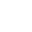
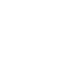

In [4]:
import requests

from bs4 import BeautifulSoup

session = requests.Session()
url = 'https://www.whatismybrowser.com'
req = session.get(url)
bsObj = BeautifulSoup(req.text, 'lxml')
print(bsObj.get_text())

In [6]:
### using urllib parser - HTTP Error 405: Method Not Allowed ###

import urllib.parse
import urllib.request

### define variables to POST ###
url = "https://www.google.com/search"
values = {'q' : 'python programming tutorials'}

### encode the values ###
data = urllib.parse.urlencode(values)
data = data.encode('utf-8') 

### send the request ###
request = urllib.request.Request(url, data)
response = urllib.request.urlopen(request)
responseData = response.read()

### print the output ###
print(responseData)

HTTPError: HTTP Error 405: Method Not Allowed

In [14]:
### Adding header specification - as Chrome ###

from bs4 import BeautifulSoup
import urllib.parse
import urllib.request

try:
     url = "https://sg.indeed.com/jobs?q=developer&l=Singapore"

     headers = {}
     headers['User-Agent'] = "Chrome/24.0.1312.27"
     request = urllib.request.Request(url, headers = headers)
     response = urllib.request.urlopen(request)
     responseData = response.read()
     bsObj = BeautifulSoup(responseData, 'lxml')
     print(bsObj.title) 
     #print(bsObj.get_text())
     print(bsObj.prettify())
     
     

except Exception as e:
    print(str(e))

<title>Developer Jobs in Singapore - March 2020 | Indeed.com</title>
<!DOCTYPE html>
<html dir="ltr" lang="en">
 <head>
  <meta content="text/html;charset=utf-8" http-equiv="content-type"/>
  <script src="//d1ewxbznfa539k.cloudfront.net/s/554cf45/en_SG.js" type="text/javascript">
  </script>
  <link href="//d1ewxbznfa539k.cloudfront.net/s/e1d8b3d/jobsearch_all.css" rel="stylesheet" type="text/css"/>
  <link href="http://sg.indeed.com/rss?q=developer&amp;l=Singapore" rel="alternate" title="Developer Jobs, careers in Singapore" type="application/rss+xml"/>
  <link href="/m/jobs?q=developer&amp;l=Singapore" media="only screen and (max-width: 640px)" rel="alternate"/>
  <link href="/m/jobs?q=developer&amp;l=Singapore" media="handheld" rel="alternate"/>
  <script type="text/javascript">
   if (typeof window['closureReadyCallbacks'] == 'undefined') {
window['closureReadyCallbacks'] = [];
}

function call_when_jsall_loaded(cb) {
if (window['closureReady']) {
cb();
} else {
window['closureRead

In [ ]:
getExternalLinks(bsObj, excludeUrl)


In [ ]:
splitAddress(address)

In [ ]:
getRandomExternalLink(startingPage)

In [ ]:
followExternalOnly(startingSite)

In [2]:
#!pip install -U selenium

In [1]:
### Website interaction ###
!pip install selenium
from selenium import webdriver
from selenium.webdriver.remote.webelement import WebElement
from selenium.webdriver.common.keys import Keys
from selenium.webdriver import ActionChains

#browser = webdriver.Firefox(executable_path='geckodriver.exe')
browser = webdriver.Chrome(executable_path='chromedriver.exe')
browser.get('http://pythonscraping.com/pages/files/form.html')

firstnameField = browser.find_element_by_name("firstname")
lastnameField = browser.find_element_by_name("lastname")
submitButton = browser.find_element_by_id("submit")

### Method 1 ###
firstnameField.send_keys("Ryan")
lastnameField.send_keys("Mitchell")
submitButton.click()



In [2]:
### Action chains ###

from selenium import webdriver
from selenium.webdriver.remote.webelement import WebElement
from selenium.webdriver.common.keys import Keys
from selenium.webdriver import ActionChains

#browser = webdriver.Firefox(executable_path='geckodriver.exe')
browser = webdriver.Chrome(executable_path='chromedriver.exe')
browser.get('http://pythonscraping.com/pages/files/form.html')

firstnameField = browser.find_element_by_name("firstname")
lastnameField = browser.find_element_by_name("lastname")
submitButton = browser.find_element_by_id("submit")

### Method 2 ###
actions = ActionChains(browser).click(firstnameField).send_keys("Ryan").click(lastnameField).send_keys("Mitchell").send_keys(Keys.RETURN)

actions.perform()


In [19]:
### Screen shot ###

from selenium import webdriver

browser = webdriver.Chrome()
browser.get('http://pythonscraping.com/')
browser.get_screenshot_as_file('pythonscraping.png') ### image saved in Documents (Home) folder

ModuleNotFoundError: No module named 'selenium'

In [15]:
### Easier to use urllib for specific image download ###

import urllib
from urllib import request

url = "http://pythonscraping.com/sites/default/files/lrg_0.jpg"

urllib.request.urlretrieve(url, "test.jpg")

('test.jpg', <http.client.HTTPMessage at 0x18a5cc92278>)

In [2]:
### headless Chrome -- 

import time
from selenium import webdriver
from selenium.webdriver.chrome.options import Options 
options_arg = Options()
options_arg.add_argument('--headless')

driver = webdriver.Chrome(options=options_arg)
driver.get('http://pythonscraping.com/pages/javascript/ajaxDemo.html')
time.sleep(3)

print(driver.find_element_by_id('content').text)
driver.close()

Here is some important text you want to retrieve!
A button to click!


In [4]:
### Yahoo Search ###

from selenium import webdriver
from selenium.webdriver.common.keys import Keys

browser = webdriver.Chrome()
#browser = webdriver.Firefox(executable_path='geckodriver.exe')

browser.get('http://www.yahoo.com')
assert 'Yahoo' in browser.title ### ensure the browser webpage

elem = browser.find_element_by_name('p')  # Find the search box name = 'p'
elem.send_keys('seleniumhq' + Keys.RETURN)

#browser.quit()

ModuleNotFoundError: No module named 'selenium'

In [3]:
### Trip Advisor Exercise

from selenium import webdriver
import time

driver = webdriver.Chrome()
#driver = webdriver.Firefox(executable_path='geckodriver.exe')
driver.get('https://www.tripadvisor.com.sg/Attraction_Review-g294264-d2439664-Reviews-Universal_Studios_Singapore-Sentosa_Island.html')
time.sleep(3)

try:        
    # get and print review text
    textlinks = driver.find_elements_by_xpath('//q[@class="location-review-review-list-parts-ExpandableReview__reviewText--gOmRC"]')
    try:
        for link in textlinks:
            print(link.text+'\n')
    except Exception as e:
        print('Error Text Link')
           
except Exception as e:
    print("main error")
    print(str(e))


My friends and I recently visited USS despite the COVID-19 scare (we're fearless that way. Haha!) The experience is totally different from my previous trips to this amusement park because there are no queue at all. The thrill rides are awesome as always. The Mummy is still my…

I’ve been in Universal Studios in the US and this is more a small theme park with some great rides. Very clean throughout with friendly staff. Because of the corona virus scare the park was very empty with only about a five minute wait for any ride which was perfect as we had…

We had a good time there though we had a short time there. Interesting location to visit once if you are in Singapore. Ticket seems a little expensive. Otherwise a good experience.

Fantastic day Lots of rides for all ages Souvenirs were not as expensive as I thought they would be All around great day

except for long queues this is the best place to have fun, I've been there 4 times already. never get enough.



In [8]:
### Trip Advisor Exercise

from selenium import webdriver
import time

driver = webdriver.Chrome()
#driver = webdriver.Firefox(executable_path='geckodriver.exe')
driver.get('https://www.tripadvisor.com.sg/Attraction_Review-g294264-d2439664-Reviews-Universal_Studios_Singapore-Sentosa_Island.html')
time.sleep(3)

try:        
    # get "read more" link and click
    explinks = 
    try:       
        for explink in explinks:
            explink.click()
    except Exception as e:
        print(str(e))

    # get and print review text
    textlinks = driver.find_elements_by_xpath('//q[@class="location-review-review-list-parts-ExpandableReview__reviewText--gOmRC"]')
    try:
        for link in textlinks:
            print(link.text+'\n')
    except Exception as e:
        print('Error Text Link')
    
        
except Exception as e:
    print("main error")
    print(str(e))

SyntaxError: invalid syntax (<ipython-input-8-6c3132c8e1b8>, line 13)

In [ ]:
for link in bsObj.find_all('jobmap[0]'):
    #print(link.get('href'))
    print(link.get_text())

In [ ]:
bsObj.find("div", {"class":"jobsearch-SerpJobCard unifiedRow row result"})